# Testing LOSD
### Bevölkerung nach statistischer Zone, seit 1993

Wirtschaftliche Wohnbevölkerung der Stadt Zürich nach Statistischer Zone und Jahr, seit ...

https://data.integ.stadt-zuerich.ch/dataset/bev324od3241 

Datum: 12.02.2024

### Colab
Mit Colab kann das Jupyter-Notebook interaktiv im Browser gestartet werden. 

Klicke auf den Button:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/DonGoginho/colab/blob/main/losd/colab_bev3241_losd_bev_bestand_jahr_statzonen_od3241.ipynb)


### Importiere die notwendigen Packages

In [1]:
#%pip install altair datetime folium geopandas io requests matplotlib numpy pandas seaborn plotly
!pip install altair==5.0.1 vl-convert-python

In [2]:
import altair as alt
import datetime
import folium 
import geopandas as gpd
import io
from IPython.display import Markdown as md
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
#import pivottablejs
#from pivottablejs import pivot_ui
import plotly.express as px
import requests
import seaborn as sns

Importiere die eigenen Funktionen, die unter ../0_scripts abegelegt sind:

1) Klone das Github-Repo auf Colab. Sonst werden die Skripts nicht gelesen...

In [ ]:
!git clone https://github.com/DonGoginho/colab.git


fatal: destination path 'colab' already exists and is not an empty directory.


2) Checke die Schreibrechte in den geklonten Verzeichnissen

In [ ]:
!ls -l /content/colab
!ls -l /content/colab/losd


total 20
drwxr-xr-x 4 root root 4096 Jul  3 12:58 0_scripts
drwxr-xr-x 2 root root 4096 Jul  3 12:58 archiv
-rw-r--r-- 1 root root 1211 Jul  3 12:58 LICENSE
drwxr-xr-x 5 root root 4096 Jul  3 12:58 losd
-rw-r--r-- 1 root root 1755 Jul  3 12:58 README.md
total 4484
-rw-r--r-- 1 root root  216728 Jul  3 12:58 bev3160_losd_bev_bestand_jahr_konfession_od3160.ipynb
-rw-r--r-- 1 root root 1755589 Jul  3 12:58 bev3240_losd_bev_bestand_jahr_quartier_od3240.ipynb
-rw-r--r-- 1 root root  696643 Jul  3 12:58 bev3241_losd_bev_bestand_jahr_statzonen_od3241.ipynb
-rw-r--r-- 1 root root 1152082 Jul  3 12:58 bev3242_losd_bev_bestand_jahr_kreis_od3242.ipynb
-rw-r--r-- 1 root root  285094 Jul  3 12:58 bev3243_losd_bev_bestand_jahr_od3243.ipynb
-rw-r--r-- 1 root root  461744 Jul  3 12:58 colab_bev3243_losd_bev_bestand_jahr_od3243.ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:59 grafiken_testing
drwxr-xr-x 2 root root    4096 Jul  3 12:58 org_ipynb
drwxr-xr-x 2 root root    4096 Jul  3 12:58 saved_data


3) Importiere die Skripts

In [ ]:
import sys
sys.path.append('/content/colab/0_scripts')

import my_py_dataviz_functions as mypy_dv
import my_py_dataloading_functions as mypy_dl

In [4]:
SSL_VERIFY = False
# evtl. SSL_VERIFY auf False setzen wenn die Verbindung zu https://www.gemeinderat-zuerich.ch nicht klappt (z.B. wegen Proxy)
# Um die SSL Verifikation auszustellen, bitte die nächste Zeile einkommentieren ("#" entfernen)
# SSL_VERIFY = False

In [5]:
if not SSL_VERIFY:
    import urllib3
    urllib3.disable_warnings()

### Settings
Definiere Settings. 
Hier das Zahlenformat von Float-Werten (z.B. *'{:,.2f}'.format* mit Komma als Tausenderzeichen)

In [6]:
#pd.options.display.float_format = lambda x : '{:,.1f}'.format(x) if (np.isnan(x) | np.isinf(x)) else '{:,.0f}'.format(x) if int(x) == x else '{:,.1f}'.format(x)
pd.options.display.float_format = '{:.0f}'.format
pd.set_option('display.width', 100)
pd.set_option('display.max_columns', 15)

#### Zeitvariabeln

In [7]:
#Zeitvariabeln als Strings:
now = datetime.date.today()
year_today = now.strftime("%Y")
date_today = "_"+now.strftime("%Y-%m-%d")

#Zeitvariabeln als Integers:
int_times = now.timetuple()
aktuellesJahr = int_times[0]
aktuellerMonat = int_times[1]
selectedMonat = int_times[1]-2
#print(aktuellesJahr, aktuellerMonat,'datenstand: ', selectedMonat, int_times)

### Daten importieren und Metadaten checken

- status: int / prod
- data_source: web / ld / dropzone
- datums_attr: beschreibt das oder die Datumsfelder, die als Datum geparsed werden sollen. Falls es keines gibt: None

In [8]:
#speichere die variable global, damit ich sie später verwenden kann, wenn ich grafiken mit diesem namen speichere.
package_name = "bev324od3241"

In [9]:
data2betested = mypy_dl.load_data(
    status = 'int'
    , data_source = 'ld'
    , package_name = package_name
    , dataset_name = "bev324od3241.csv"    
    , datums_attr = ['ZEIT_LANG']
    )

fp lautet:https://ld.integ.stadt-zuerich.ch/statistics/view/BEV324OD3241/observation?format=csv


 **Überprüfe die Metadaten:**

 **Dataset auf INTEG-Datakatalog:** Link https://data.integ.stadt-zuerich.ch/dataset/bev324od3241 

 **View auf INTEG-LD:** Link https://ld.integ.stadt-zuerich.ch/statistics/view/BEV324OD3241 

data_source: web


In [10]:
data2betested.head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BEW,Datenstatus,QUARTIEREZH_LANG,QUARTIEREZH_CODE,KREISEZH_LANG,KREISEZH_CODE
0,2008-12-31,Z31122008,Strassenverkehrsamt,R3Z047,1454,Veröffentlicht,Friesenberg,R00033,Kreis 3 (ab 1915),R00600
1,2019-12-31,Z31122019,Grünhaldenstrasse,R3Z203,2087,Veröffentlicht,Seebach,R00119,Kreis 11 (ab 1970),R01800


Berechne weitere Attribute falls notwendig

In [11]:
data2betested = (
    data2betested
    .copy()
    .assign(
        #Aktualisierungs_Datum_str= lambda x: x.Aktualisierungs_Datum.astype(str),
        StichtagDatJahr = lambda x: x.ZEIT_LANG,
        StichtagDatJahr_str = lambda x: x.ZEIT_LANG.astype(str),
        Jahr = lambda x: x.ZEIT_LANG.dt.year,
        #Jahr_nbr = lambda x: x.ZEIT_code.str[-4:].astype(int),    
        RAUM_my_sort = lambda x: x.RAUM_CODE.str[-3:].astype(int),

    )
    .sort_values(['Jahr','RAUM_my_sort'], ascending=[False, True])
    )
data2betested.head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BEW,Datenstatus,QUARTIEREZH_LANG,QUARTIEREZH_CODE,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort
2437,2023-12-31,Z31122023,Zähringerstrasse,R3Z001,595,Provisorisch,Rathaus,R00011,Kreis 1 (Stadtgebiet vor 1893),R10000,2023-12-31,2023-12-31,2023,1
313,2023-12-31,Z31122023,Prediger,R3Z002,1045,Provisorisch,Rathaus,R00011,Kreis 1 (Stadtgebiet vor 1893),R10000,2023-12-31,2023-12-31,2023,2


Zeitbereich aus den Daten:

In [12]:
data_max_date = str(max(data2betested.ZEIT_LANG).year)
data_min_date = str(min(data2betested.ZEIT_LANG).year)

print(f"Die Daten haben ein Minimumjahr von {data_min_date} und ein Maximumjahr von {data_max_date}")


Die Daten haben ein Minimumjahr von 1993 und ein Maximumjahr von 2023


Temp speichere die csv-Datei, da es immer wieder zu Ausfällen kommt. So kann ich mal den Report fertig bauen.

In [13]:
docname = package_name +date_today+".csv"
print(docname)


bev324od3241_2024-06-19.csv


In [14]:
data2betested.to_csv('/content/colab/losd/saved_data/'+docname, index=False)

### Einfache Datentests

In [15]:
data2betested.head(2).T

,2437,313
ZEIT_LANG,2023-12-31 00:00:00,2023-12-31 00:00:00
ZEIT_CODE,Z31122023,Z31122023
RAUM_LANG,Zähringerstrasse,Prediger
RAUM_CODE,R3Z001,R3Z002
BEW,595,1045
Datenstatus,Provisorisch,Provisorisch
QUARTIEREZH_LANG,Rathaus,Rathaus
QUARTIEREZH_CODE,R00011,R00011
KREISEZH_LANG,Kreis 1 (Stadtgebiet vor 1893),Kreis 1 (Stadtgebiet vor 1893)
KREISEZH_CODE,R10000,R10000


In [16]:
data2betested.info(memory_usage='deep', verbose=True)

<class 'pandas.core.frame.DataFrame'>
Index: 6566 entries, 2437 to 815
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ZEIT_LANG            6566 non-null   datetime64[ns]
 1   ZEIT_CODE            6566 non-null   object        
 2   RAUM_LANG            6566 non-null   object        
 3   RAUM_CODE            6566 non-null   object        
 4   BEW                  6566 non-null   float64       
 5   Datenstatus          6566 non-null   object        
 6   QUARTIEREZH_LANG     6566 non-null   object        
 7   QUARTIEREZH_CODE     6566 non-null   object        
 8   KREISEZH_LANG        6566 non-null   object        
 9   KREISEZH_CODE        6566 non-null   object        
 10  StichtagDatJahr      6566 non-null   datetime64[ns]
 11  StichtagDatJahr_str  6566 non-null   object        
 12  Jahr                 6566 non-null   int32         
 13  RAUM_my_sort         6566 non-null  

In [17]:
print(f'The dataset has {data2betested.shape[0]:,.0f} rows (observations) and {data2betested.shape[1]:,.0f} columns (variables).')
print(f'There seem to be {data2betested.duplicated().sum()} exact duplicates in the data.')

The dataset has 6,566 rows (observations) and 14 columns (variables).
There seem to be 0 exact duplicates in the data.


Welches sind die Quartiere ohne Werte bei BEW?

In [18]:
data2betested[np.isnan(data2betested.BEW)]

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BEW,Datenstatus,QUARTIEREZH_LANG,QUARTIEREZH_CODE,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr,StichtagDatJahr_str,Jahr,RAUM_my_sort


### Verwende das Datum als Index

While we did already parse the `datetime` column into the respective datetime type, it currently is just a regular column. 
**To enable quick and convenient queries and aggregations, we need to turn it into the index of the DataFrame**

In [19]:
data2betested = data2betested.set_index("StichtagDatJahr") 
data2betested = data2betested.sort_index()

In [20]:
data2betested.index.year.unique()

Index([1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007,
       2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022,
       2023],
      dtype='int32', name='StichtagDatJahr')

### Beschreibe einzelne Attribute

Beschreibe nicht numerische Attribute

In [21]:
# describe non-numerical features
try:
    with pd.option_context('display.float_format', '{:,.2f}'.format):
        display(data2betested.describe(exclude='number',datetime_is_numeric=True))
except:
    print("No categorical data in dataset.")

No categorical data in dataset.


Beschreibe numerische Attribute

In [22]:
# describe numerical features
try:
    with pd.option_context('display.float_format', '{:,.0f}'.format):
        display(data2betested.describe(include='number'))
except:
    print("No numercial data in dataset.")

,BEW,Jahr,RAUM_my_sort
count,"6,566","6,566","6,566"
mean,"1,837","2,008",110
std,"1,058",9,62
min,6,"1,993",1
25%,"1,065","2,000",56
50%,"1,763","2,008",109
75%,"2,491","2,016",164
max,"6,756","2,023",216


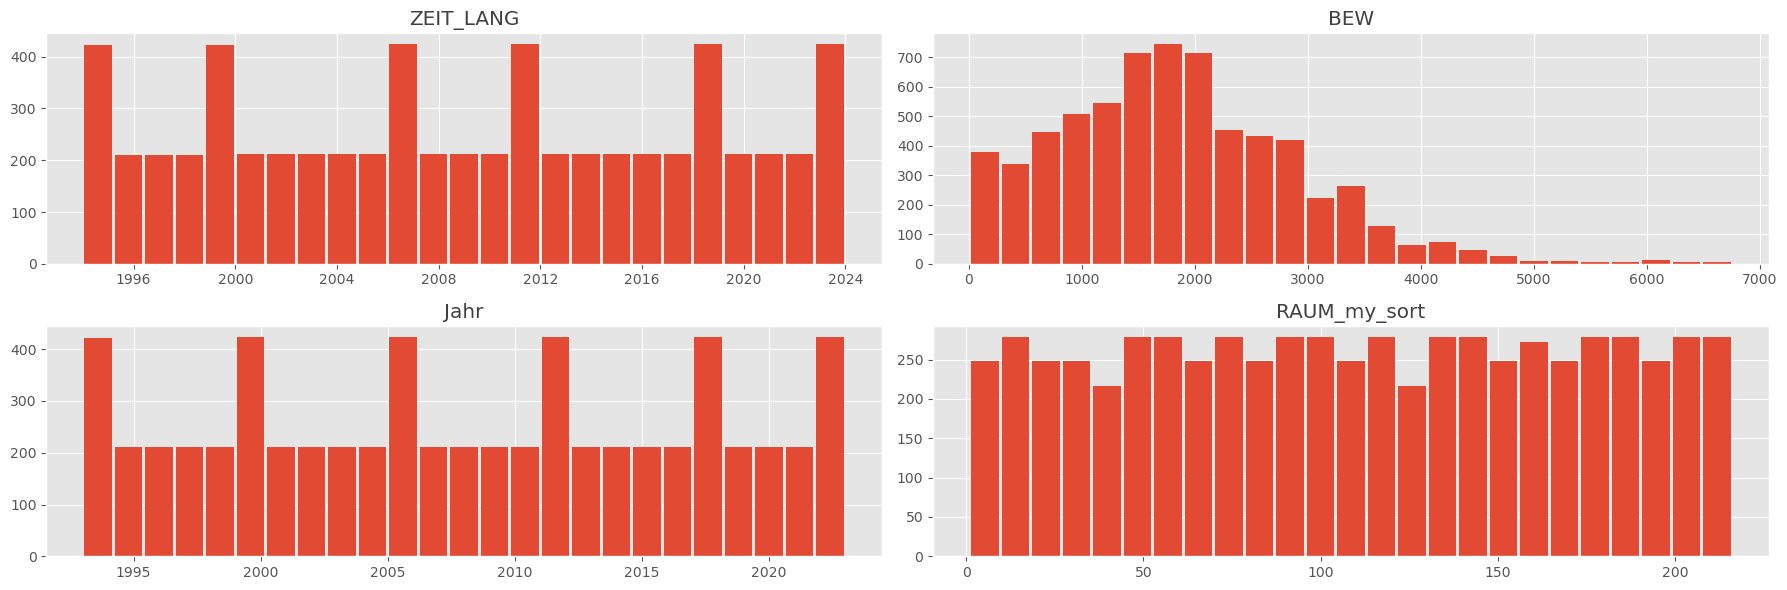

In [23]:
plt.style.use('ggplot')
params = {
    'text.color': (0.25, 0.25, 0.25),
    'figure.figsize': [18, 6],
   }
plt.rcParams.update(params)

try:
    data2betested.hist(bins=25, rwidth=0.9)
    plt.tight_layout()
    plt.show()
except:
    print("No numercial data to plot.") 

### Gibt es Duplikate?

In [24]:
# find duplicate rows
duplicate_rows = data2betested[data2betested.duplicated()]
duplicate_rows

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BEW,Datenstatus,QUARTIEREZH_LANG,QUARTIEREZH_CODE,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,,


### Nullwerte und Missings?

In [25]:
data2betested.isnull().sum()

ZEIT_LANG              0
ZEIT_CODE              0
RAUM_LANG              0
RAUM_CODE              0
BEW                    0
Datenstatus            0
QUARTIEREZH_LANG       0
QUARTIEREZH_CODE       0
KREISEZH_LANG          0
KREISEZH_CODE          0
StichtagDatJahr_str    0
Jahr                   0
RAUM_my_sort           0
dtype: int64

In [26]:
# check missing values with missingno
# https://github.com/ResidentMario/missingno
import missingno as msno
#msno.matrix(data2betested, labels=True, sort='descending');
#msno.heatmap(data2betested)

### Gruppierungen

In [27]:
agg_jahr = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr']) \
    .agg(sum_AnzBestWir=('BEW', 'sum')) \
    .sort_values('Jahr', ascending=False) 
agg_jahr.reset_index().head(3)

,Jahr,sum_AnzBestWir
0,2023,447082
1,2022,443037
2,2021,436332


In [28]:
data2betested.RAUM_LANG.unique()

array(['Probsteistrasse', 'Hardturm', 'Konradstrasse', 'Ackerstrasse',
       'Berufsschulen', 'Kornhaus', 'Quellenstrasse', 'Josefswiese',
       'Güterbahnhof', 'Lochergut', 'Bullingerhof', 'Technopark',
       'Hardau', 'Kaserne', 'Volkshaus', 'Bezirksgebäude', 'Wengi',
       'Bäckeranlage', 'Schöneggplatz', 'Schöntalstrasse', 'Werdplatz',
       'Kalkbreite', 'Sihlhölzli', 'Schlachthof', 'Neue Hard',
       'KV-Business School', 'Nordheim', 'Hochstrasse', 'Toblerstrasse',
       'Keltenstrasse', 'Susenberg', 'Rigiblick', 'Rigiviertel',
       'Bolleystrasse', 'Culmannstrasse', 'Riedtli', 'Letzistrasse',
       'Strickhof', 'Beckenhof', 'Drahtschmidli', 'Krone',
       'Weinbergstrasse', 'Irchel', 'Scheuchzerstrasse', 'Guggach',
       'Seminarstrasse', 'Steinkluppe', 'Radio-Studio', 'Allenmoos',
       'Kiefernweg', 'Bahnhof Wiedikon', 'Platte', 'Zwinglihaus',
       'Fritschistrasse', 'Kalchbühl', 'Auf der Egg', 'Waschanstalt',
       'Manegg', 'Morgental', 'Muggenbühl', 'Bellari

In [29]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'BEW', 'Datenstatus',
       'QUARTIEREZH_LANG', 'QUARTIEREZH_CODE', 'KREISEZH_LANG', 'KREISEZH_CODE',
       'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [30]:
agg_StaZ = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['RAUM_my_sort', 'RAUM_LANG', 'RAUM_CODE', 'QUARTIEREZH_LANG', 'KREISEZH_CODE']) \
    .agg(sum_AnzBestWir=('BEW', 'sum')) \
    .sort_values('RAUM_CODE', ascending=True) 
agg_StaZ.reset_index().head(40)

,RAUM_my_sort,RAUM_LANG,RAUM_CODE,QUARTIEREZH_LANG,KREISEZH_CODE,sum_AnzBestWir
0,1,Zähringerstrasse,R3Z001,Rathaus,R10000,17284
1,2,Prediger,R3Z002,Rathaus,R10000,31474
2,3,Grossmünster,R3Z003,Rathaus,R10000,28022
3,4,Oberdorf,R3Z004,Rathaus,R10000,21189
4,5,Central,R3Z005,Hochschulen,R10000,11439
5,6,ETH / Universität,R3Z006,Hochschulen,R10000,2538
6,7,Bellevue,R3Z007,Hochschulen,R10000,8024
7,9,Schipfe,R3Z009,Lindenhof,R10000,14703
8,10,Münsterhof,R3Z010,Lindenhof,R10000,14233
9,11,Stadthaus,R3Z011,Lindenhof,R10000,1722


### Zeitpunkte und Zeiträume abfragen

A particular powerful feature of the Pandas DataFrame is its indexing capability that also works using time-based entities, such as dates and times. We have already created the index above, so let's put it to use.

In [31]:
data2betested.loc[data_max_date].head(2)
#data2betested.loc["2021-10-31":"2021-11-30"].head(2)

,ZEIT_LANG,ZEIT_CODE,RAUM_LANG,RAUM_CODE,BEW,Datenstatus,QUARTIEREZH_LANG,QUARTIEREZH_CODE,KREISEZH_LANG,KREISEZH_CODE,StichtagDatJahr_str,Jahr,RAUM_my_sort
StichtagDatJahr,,,,,,,,,,,,,
2023-12-31,2023-12-31,Z31122023,Lochergut,R3Z070,1993,Provisorisch,Hard,R00044,Kreis 4 (ab 1915),R00700,2023-12-31,2023,70
2023-12-31,2023-12-31,Z31122023,Hardturm,R3Z078,2183,Provisorisch,Escher Wyss,R00052,Kreis 5 (ab 1915),R00800,2023-12-31,2023,78


### Visualisierungen nach Zeitausschnitten

#### Entwicklung Wohnbevölkerung seit ...

In [32]:
myAgg1 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=False) 

myAgg1.reset_index().head(20)

,StichtagDatJahr,sum_WBev
0,2023-12-31,447082
1,2022-12-31,443037
2,2021-12-31,436332
3,2020-12-31,434736
4,2019-12-31,434008
5,2018-12-31,428737
6,2017-12-31,423310
7,2016-12-31,415682
8,2015-12-31,410404
9,2014-12-31,404783


In [33]:
grafik1 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg1.reset_index().query('sum_WBev>30')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_WBev:Q'
    ,y_beschriftung = 'Anz. Personen'
    ,category = ''
    ,category_beschriftung= 'Legende:'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Bevölkerungsentwicklung, seit "+str(data2betested.index.year.min())
)
grafik1

alt.LayerChart(...)

In [34]:
grafic_name = package_name+"_alt1_total"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik1.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bev324od3241_alt1_total_2024-06-19.png


#### Entwicklung Wohnbevölkerung nach Statistischer Zone seit 1993

In [35]:
data2betested.columns

Index(['ZEIT_LANG', 'ZEIT_CODE', 'RAUM_LANG', 'RAUM_CODE', 'BEW', 'Datenstatus',
       'QUARTIEREZH_LANG', 'QUARTIEREZH_CODE', 'KREISEZH_LANG', 'KREISEZH_CODE',
       'StichtagDatJahr_str', 'Jahr', 'RAUM_my_sort'],
      dtype='object')

In [36]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAgg2 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'RAUM_my_sort','RAUM_LANG', 'RAUM_CODE', 'QUARTIEREZH_LANG']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAgg2.reset_index().head(3)

,StichtagDatJahr,RAUM_my_sort,RAUM_LANG,RAUM_CODE,QUARTIEREZH_LANG,sum_WBev
0,1993-12-31,1,Zähringerstrasse,R3Z001,Rathaus,584
1,1993-12-31,140,Zollfreilager,R3Z140,Albisrieden,2245
2,1993-12-31,141,In der Ey,R3Z141,Albisrieden,3473


In [37]:
grafik2 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg2.reset_index().query('RAUM_my_sort < 50')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_WBev:Q'
    ,y_beschriftung = 'Anz. Personen'
    ,category = "RAUM_LANG:N"
    ,category_beschriftung= 'Legende:'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Bevölkerung nach ausgewählten Statistischen Zonen, seit "+str(data2betested.index.year.min())
)
grafik2

alt.LayerChart(...)

In [38]:
grafic_name = package_name+"_alt2_raum_zeit"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik2.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bev324od3241_alt2_raum_zeit_2024-06-19.png


#### Entwicklung Wohnbevölkerung nach Stadtquartieren seit ...

In [39]:
myAgg3 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'QUARTIEREZH_LANG', 'QUARTIEREZH_CODE']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=False) 

myAgg3.reset_index().head(2)

,StichtagDatJahr,QUARTIEREZH_LANG,QUARTIEREZH_CODE,sum_WBev
0,2023-12-31,Wollishofen,R00021,21181
1,2023-12-31,Fluntern,R00071,8783


In [40]:
grafik3 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg3.reset_index().query('sum_WBev>30')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_WBev:Q'
    ,y_beschriftung = 'Anz. Personen'
    ,category = 'QUARTIEREZH_LANG'
    ,category_beschriftung= 'Legende:'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Bevölkerungsentwicklung nach Stadtquartier, seit "+str(data2betested.index.year.min())
)
grafik3

alt.LayerChart(...)

In [41]:
grafic_name = package_name+"_alt3_quartiere"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik3.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bev324od3241_alt3_quartiere_2024-06-19.png


#### Entwicklung Wohnbevölkerung nach Stadtkreisen seit ...

In [42]:
myAgg4 = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr', 'KREISEZH_LANG', 'KREISEZH_CODE']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=False) 

myAgg4.reset_index().head(2)

,StichtagDatJahr,KREISEZH_LANG,KREISEZH_CODE,sum_WBev
0,2023-12-31,altes Quartier Schwamendingen (1934-1969); Kre...,R01700,33537
1,2023-12-31,Kreis 4 (ab 1915),R00700,29944


In [43]:
grafik4 = mypy_dv.plot_altair_multiline_highlight(
    data = myAgg4.reset_index().query('sum_WBev>30')
    ,x = 'StichtagDatJahr:T'
    ,x_beschriftung = 'Jahr'
    ,y = 'sum_WBev:Q'
    ,y_beschriftung = 'Anz. Personen'
    ,category = 'KREISEZH_LANG'
    ,category_beschriftung= 'Legende:'
    ,warning_status = "ignore" #always or ignore
    ,myTitle="Bevölkerungsentwicklung nach Stadtquartier, seit "+str(data2betested.index.year.min())
)
grafik4

alt.LayerChart(...)

In [44]:
grafic_name = package_name+"_alt4_kreise"+date_today+".png"
print('grafiken_testing/'+grafic_name)

grafik4.save('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/bev324od3241_alt4_kreise_2024-06-19.png


#### Barcharts mit Seaborn

In [45]:
#myAgg = data2betested.loc["2008-11-30":"2021-10-31"]
myAggBar = data2betested.loc[data_min_date:data_max_date]\
    .groupby(['StichtagDatJahr','Jahr', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('StichtagDatJahr', ascending=True) 

myAggBar.reset_index().head(3)

,StichtagDatJahr,Jahr,RAUM_LANG,RAUM_CODE,RAUM_my_sort,sum_WBev
0,1993-12-31,1993,Ackerstrasse,R3Z076,76,1688
1,1993-12-31,1993,Mühlezelgstrasse,R3Z142,142,1746
2,1993-12-31,1993,Münsterhof,R3Z010,10,516


In [46]:
#help(sns.catplot)     

In [47]:
#Stile for the following sns graphs
sns.set_theme(style="whitegrid")


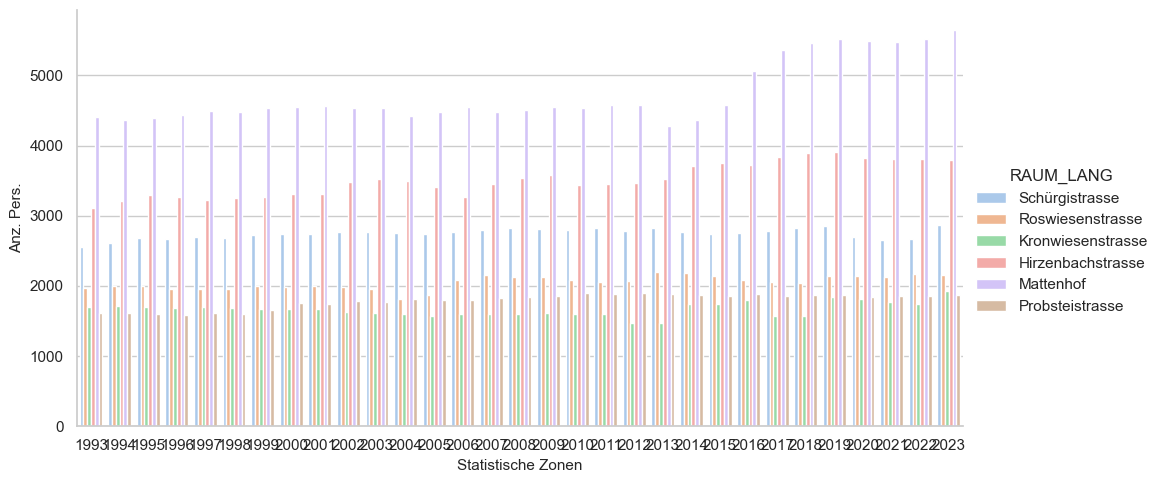

In [48]:
#sns.color_palette("flare", as_cmap=True)
myHist = sns.catplot(x="Jahr"
            , y="sum_WBev"
            , hue="RAUM_LANG"
            , kind="bar" #boxen, violin, --> wenn die aggregation nicht genau den werten in der grafik entspricht
            , palette="pastel" #, color="green"
            , height=5
            , aspect=2
            , order=None, legend_out=True
            ,data=myAggBar.reset_index().query('RAUM_my_sort > 210').sort_values("RAUM_CODE", ascending=True)
           )
myHist.set_xlabels('Statistische Zonen', fontsize=11) # not set_label
myHist.set_ylabels('Anz. Pers.', fontsize=11)


#### Faced Grids

In [49]:
myFG= data2betested.loc[data_min_date:data_max_date]\
    .groupby(['Jahr','StichtagDatJahr_str', 'RAUM_LANG', 'RAUM_CODE', 'RAUM_my_sort']) \
    .agg(sum_WBev=('BEW', 'sum')) \
    .sort_values('RAUM_my_sort', ascending=True) 

myFG

,,,,,sum_WBev
Jahr,StichtagDatJahr_str,RAUM_LANG,RAUM_CODE,RAUM_my_sort,
2023,2023-12-31,Zähringerstrasse,R3Z001,1,595
1994,1994-12-31,Zähringerstrasse,R3Z001,1,555
2014,2014-12-31,Zähringerstrasse,R3Z001,1,566
1999,1999-12-31,Zähringerstrasse,R3Z001,1,539
1997,1997-12-31,Zähringerstrasse,R3Z001,1,520
...,...,...,...,...,...
2021,2021-12-31,Probsteistrasse,R3Z216,216,1854
2004,2004-12-31,Probsteistrasse,R3Z216,216,1811
2002,2002-12-31,Probsteistrasse,R3Z216,216,1783


In [50]:
"""
faced_grid1 = mypy_dv.plot_sns_facetgrid(
    data = myFG.reset_index()
    ,col = "RAUM_LANG"
    ,hue = "RAUM_LANG"
    ,col_wrap = 6
    ,height = 3
    ,grafiktyp = sns.lineplot
    ,x = "Jahr"
    ,xlabel = ''
    ,y = "sum_WBev"
    ,ylabel= "Anzahl Personen"
    ,warning_status ="ignore"
    ,myTitle="Bevölkerungsentwicklung pro Statistischer Zone, seit "+str(data2betested.index.year.min())
)
faced_grid1


SyntaxError: incomplete input (1352691251.py, line 1)

In [ ]:
grafic_name = package_name+"_fg_statZone_zeit_"+date_today+".png"

print('grafiken_testing/'+grafic_name)


faced_grid1.savefig('/content/colab/losd/grafiken_testing/'+grafic_name)

grafiken_testing/BEV324OD3241_fg_statZone_zeit__2024-05-28.png


## ---------------------- hier Plausi beendet

Übersicht zu LOSD-Jobs:
[Sharepoint](https://kollaboration.intranet.stzh.ch/orga/ssz-produkte/Lists/SASA_Outputs/OGD%20Metadaten.aspx#InplviewHasheb69a2c0-ed94-4ef2-91a5-3b19f038e442=FilterField1%3DMetadaten%255Fx002d%255FPublikations%255Fx00-FilterValue1%3DINT)